<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2019-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisi de les dades
  <br>2.1 Anàlisi estadístic bàsic
  <br>2.2 Anàlisi exploratori de les dades
  <li>Reducció de la dimensionalitat</li>
  <li>Entrenament i test</li>
</ol>

**Important**: *Cada exercici pot suposar diversos minuts d'execució. El lliurament s'ha de fer en format notebook i html, on es vegi el codi i els resultats, juntament amb els comentaris de cada exercici. Per exportar el notebook a html es pot fer des del menú File $\to$ Download as $\to$ HTML.*

Per a realitzar aquesta PAC, necessitarem les següents llibreries:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nom i cognoms: Claudia Puche Garcia </strong>
</div>

In [1]:
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns;
from sklearn import datasets
from sklearn import preprocessing
from six import StringIO 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import pydotplus


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Càrrega del conjunt de dades (1 punt)

En primer lloc, carregueu el conjunt de dades Wine recognition (més informació a l'enllaç [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)). Es pot descarregar d'Internet o es pot carregar directament desde la llibreria "scikit-learn", que incorpora un conjunt de datasets molt coneguts i usats per a la mineria de dades i machine learning [http://scikit-learn.org/stable/datasets/index.html](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Carregueu el conjunt de dades "Wine Recognition" i mostreu:
<br> - el nombre i nom dels atributs (variables que podrien ser usades per a predir la resposta "wine_class")
<br> - el nombre de files del conjunt de dades
<br> - verifiqueu si hi ha o no dades mancants ("missing values") i en quines columnes
<hr>
Suggeriment: Si useu sklearn (sklearn.datasets.load_wine), exploreu les diferents 'keys' de l'objecte obtingut.
    
Suggeriment: Igual us resulta útil passar les dades (atributs + target) a un dataframe de pandas.
</div>

In [2]:
# Carregam el dataset directament de sklearn

from sklearn.datasets import load_wine
data = load_wine()
wine_data = pd.DataFrame(data['data'], columns = data['feature_names'])
wine_data ['wine_class'] = data ['target']

# Mostram els primers registres

wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Mostram per pantalla el nombre d'atributs del dataset

nombre_atributs = len(wine_data.columns)
print("El nombre d'atributs d'aquest dataset és:\t{}".format(nombre_atributs))

El nombre d'atributs d'aquest dataset és:	14


In [4]:
# Mostram per pantalla el nom dels atributs del dataset

print("El nom dels atributs són:")
for col in wine_data.columns:
    print(col)

El nom dels atributs són:
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
wine_class


In [5]:
# Calculam el número de registres que té el dataset

count_row = wine_data.shape[0]
print("El nombre de files en el conjunt de dades Wine Recognition és de:\t{}".format(count_row))

El nombre de files en el conjunt de dades Wine Recognition és de:	178


In [6]:
# Es comprova si existeix algun valor null a les dades

wine_data.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
wine_class                      False
dtype: bool

# 2. Anàlisi de les dades (3 punts)

## 2.1 Anàlisi estadístic bàsic

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Realitzeu un anàlisi estadístic bàsic:
<br> - Variables categòriques:
    
            - Calculeu la freqüència.
            - Feu un gràfic de barres.
<br> - Variables numèriques:
            - Calculeu estadístics descriptius "bàsics": mitjana, mediana, desviació estàndard, ...
            - Feu un histograma de les variables: alcohol, magnesium i color_intensity
<hr>
Suggeriment: podeu usar la llibreria 'pandas' i les seves funcions 'describe' i 'value_counts'
</div>

In [7]:
# Mostram els estadístics bàsics dels atributs que expliquen les dades

wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<AxesSubplot:xlabel='magnesium'>

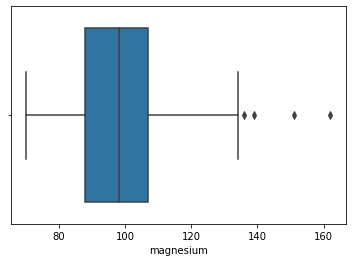

In [8]:
# Es pot comprovar que la variable magnesium té una desviació estàndard elevada. 
# Això pot ser degut a valors atípics que pot contenir aquesta variable. Per comprovar-ho

sns.boxplot(x = wine_data['magnesium'])

Efectivament trobam valors atípics extrems dintre d'aquesta variable, la qual cosa ens pot explicar el perquè de l'elevat valor que obté la seva desviació estàndard.

In [9]:
# Contam els diferents registres que hi ha a cada tipus de vi.

wine_data['wine_class'].value_counts().sort_index()

0    59
1    71
2    48
Name: wine_class, dtype: int64

<AxesSubplot:xlabel='wine_class', ylabel='count'>

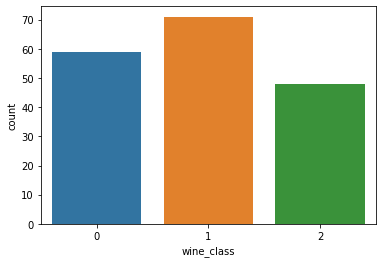

In [10]:
# Graficam la seva freqüència.

sns.countplot(x = 'wine_class', data = wine_data)

Es pot comprobar que la distribució dels diferents tipus de vins és similar tot i que, el tipus de vi de qualitat 1 és més freqüent en el nostre dataset.

(array([10., 31., 41., 45., 38., 13.]),
 array([11.03      , 11.66333333, 12.29666667, 12.93      , 13.56333333,
        14.19666667, 14.83      ]),
 <BarContainer object of 6 artists>)

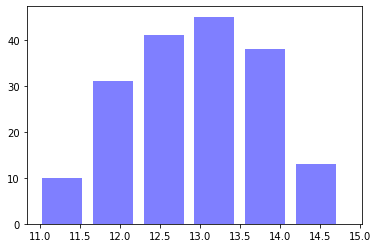

In [11]:
# A continuació es graficaran les variables alcohol, magnesium i color_intensity en diferents histogrames

plt.hist(wine_data['alcohol'], 6, facecolor='blue', alpha=0.5, width = 0.5)

(array([100.,  72.,   6.]),
 array([ 70.        , 100.66666667, 131.33333333, 162.        ]),
 <BarContainer object of 3 artists>)

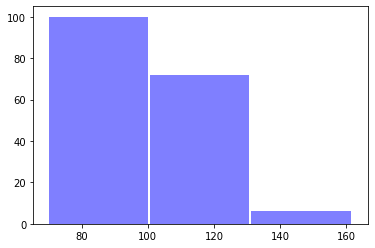

In [12]:
plt.hist(wine_data['magnesium'], 3, facecolor='blue', alpha=0.5, width = 30)

(array([45., 58., 42., 20., 11.,  2.]),
 array([ 1.28      ,  3.23333333,  5.18666667,  7.14      ,  9.09333333,
        11.04666667, 13.        ]),
 <BarContainer object of 6 artists>)

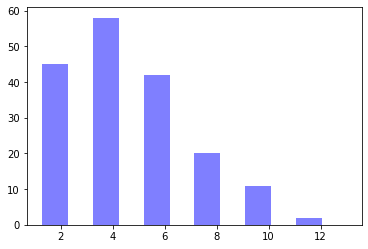

In [13]:
plt.hist(wine_data['color_intensity'], 6, facecolor='blue', alpha=0.5, width = 1)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Comenteu els resultats.
</div>

En aquest dataset els vins segueixen una distribució de gradació d'acohol entre 12 i 14 graus, sent 13 la mitjana. Per altra banda, la quantiat de magnesi que contenen la majoria dels vins registrats al dataset és entre 70 i 100. A partir dels 100, la quantitat de vins comencen a disminuir, sent molt pocs registres els que superen el 120. En aquest punt també es podria incloure els diferents valors atípics trobats anteriorment, que formen part de la última barra del gràfic i que, pot ser estan esbiaxant els valors reals d'aquest atribut. Per últim la gran quantitat de vins oscil.len entre una intensitat de color 2 i 6 i decreixent fins arribar a una intensitat màxima de 12.

## 2.2 Anàlisi exploratori de les dades

En aquest exercici explorarem la relació d'alguns dels atributs numèrics amb la variable resposta ("wine_class"), tant gràficament com quantitativament, i analitzarem les diferents correlacions. Per començar, seleccionarem només 3 atributs per explorar: alcohol, magnesium i color_intensity.

In [14]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Utilitzant una llibreria gràfica, com per exemple "matplotlib", realitzeu un gràfic de l'histograma de valors per a cada un dels atributs seleccionats, separats pels valors de classe de la resposta. Els tres gràfics han d'estar sobreposats, es a dir, per exemple, en l'histograma de la feature "alcohol" hi han d'haver en un sol gràfic tres histogrames, un per cada classe de vins. Afegiu una llegenda per saber a quina classe correspon cada histograma.

La finalitat és observar com es distribueix cadascun dels atributs en funció del valor de classe que tinguin, per a poder identificar de forma visual i ràpida si alguns atributs permeten diferenciar de forma clara les diferent classes de vins.
    
<hr>
Suggeriment: podeu utilitzar el paràmetre "alpha" en els gràfics perquè s'apreciin els tres histogrames.
</div>

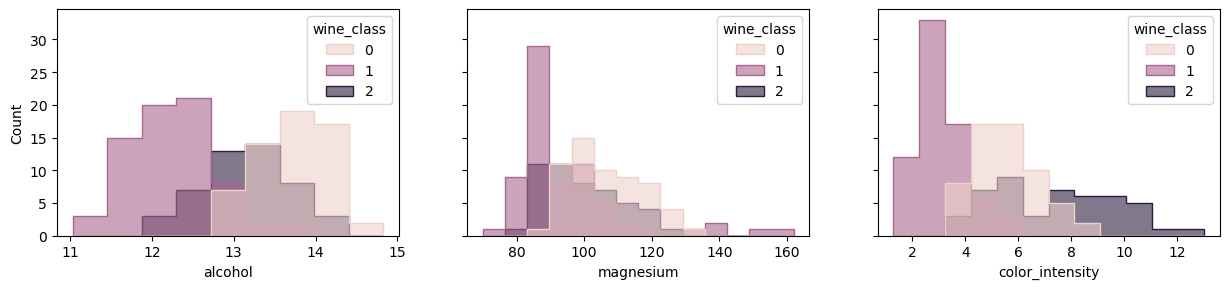

In [15]:
# Graficam les tres variables segons el target: wine_class

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True, dpi=100)
x1 = sns.histplot(wine_data, x='alcohol', hue='wine_class', ax=axes[0], element='step', alpha=0.6)
x2 = sns.histplot(wine_data, x='magnesium', hue='wine_class', ax=axes[1], element='step', alpha=0.6)
x3 = sns.histplot(wine_data, x='color_intensity', hue='wine_class', ax=axes[2], element='step', alpha=0.6)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br>Mirant els histogrames, quin atribut et sembla que tindrà més pes a l'hora de classificar un vi? Quin en tindrà menys?
</div>

Sembla que els atributs que tindran més pes a l'hora de definir la classe del vi seran el de l'alcohol i el de la intensitat del color. Per una banda, la majoria dels vins de qualitat igual a 1 tenen una gradació d'alcohol menor, seguit dels de qualitat 2 i per últim els de pitjor qualitat igual a 0 que són els que més alcohol contenen. Per altra banda, quant a la intensitat del color no existeix una diferenciació molt exacta, tot i que es pot dir que únicament els vins d'intensitat elevada de color són aquells de la millor qualitat, tot i que això no implica que si té una intesitat més lleu sigui de baixa qualitat. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Utilitzant els histogrames anteriors, afegiu una línia vertical indicant la mitjana de cada un dels histogrames (tres per gràfic). Pinteu les línies del mateix color que l'histograma perque quedi clar a quin fan referència. 
    
Afegiu a la llegenda, la classe de vi i la desviació estàndard en qüestió. 

La finalitat és verificar numèricament les diferències identificades anteriorment de forma visual.
    
<hr>
Suggeriment: podeu utilitzar "axvline", de matplotlib axis, per fer les línies verticals.
</div>

In [16]:
# Calculam les mitjanes i els colors per la variable target

mean_alcohol = wine_data.groupby('wine_class')['alcohol'].mean().tolist()
mean_magnesium = wine_data.groupby('wine_class')['magnesium'].mean().tolist()
mean_color = wine_data.groupby('wine_class')['color_intensity'].mean().tolist()
pal = sns.cubehelix_palette(3).as_hex()

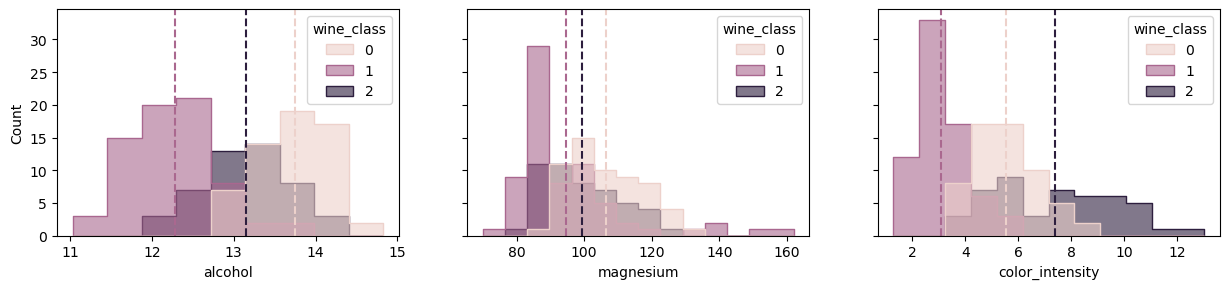

In [17]:
# Graficam les dades 

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True, dpi=100)
x1 = sns.histplot(wine_data, x='alcohol', hue='wine_class', ax=axes[0], element='step', alpha=0.6)
for i in list(range(3)):
    l1=axes[0].axvline(x=mean_alcohol[i], color=pal[i], ls='--')


x2 = sns.histplot(wine_data, x='magnesium', hue='wine_class', ax=axes[1], element='step', alpha=0.6)
for i in list(range(3)):
    l2=axes[1].axvline(x=mean_magnesium[i], color=pal[i], ls='--')

x3 = sns.histplot(wine_data, x='color_intensity', hue='wine_class', ax=axes[2], element='step', alpha=0.6)
for i in list(range(3)):
    l3=axes[2].axvline(x=mean_color[i], color=pal[i],ls='--')
plt.show()

Mitjançant la representaició de les mitjanes es pot comprovar que els atributs amb mitjanes més distants per classe són alcohol i intesitat de color, que és el que s'havia predit a la conclusió anterior. Que tinguin mitjanes més distants vol dir que els vins segons la qualitat registren valors diferents d'alcohol i color, la qual cosa ajuda a predir o identificar de quina qualitat pot ser un vi si es miren aquests atributs. Finalment, s'ha de dir que la variable magnesium no sembla aportar molt de valor a aquesta anàlisi, ja que les seves mitjanes es troben molt juntes, sent molt díficil realitzar una anàlisi predictiva de la qualitat.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Calculeu i mostreu la correlació entre les tres variables que estem analitzant.
</div>

<AxesSubplot:>

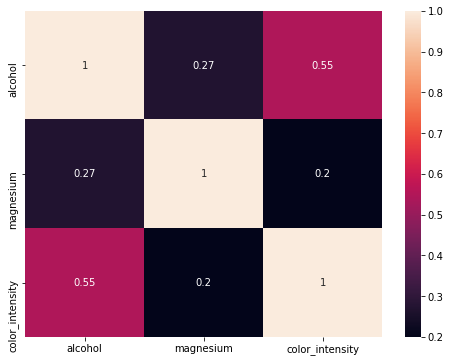

In [18]:
# Correlació entre les variables estudiades

df = wine_data[['alcohol', 'magnesium', 'color_intensity']].copy()
plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True)

Es pot comprobar que les correlacions de alcohol i magnesium i color_intensity i magnesium són relativament baixes amb valors de 0,27 i 0,2. Per altra banda, la relació entre alcohol i color_intesity és més alta sent de 0,55. Això pot implicar que per certes gradacions d'alcohol la variable del color sigui d'uns valor específics, tot i que la correlació no és molt elevada.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Representeu gràficament les relacions entre aquestes variables (scatterplots). Diferencieu amb colors diferents les diferents classes. 
    
La finalitat és poder observar i analitzar les correlacions de manera gràfica entre algunes de les variables.
    
<hr>Suggeriment: podeu usar la funció "pairplot" de la llibreria 'seaborn' amb el paràmetre "hue".
</div>

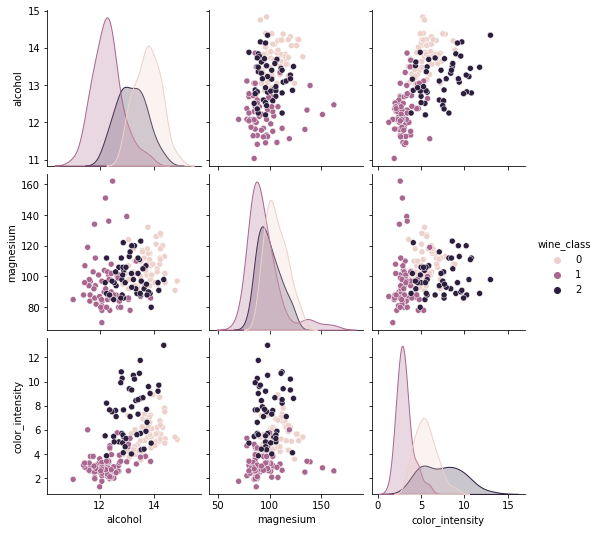

In [19]:
# Es representen les relacions entre les variables amb scatterplots.

df = wine_data[['alcohol', 'magnesium', 'color_intensity', 'wine_class']].copy()
sns.pairplot(df, hue="wine_class")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Representeu en 3D les tres variables. Poseu noms als eixos i diferencieu amb colors les diferents classes de vins. 
 
La finalitat és complementar els gràfics anteriors i poder observar quines variables discriminen millor entre les tres classes de vi.
</div>

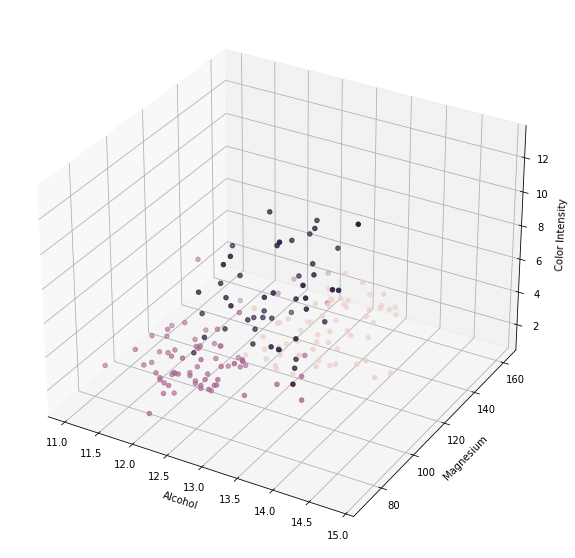

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.cubehelix_palette(3).as_hex())

x = df['alcohol']
y = df['magnesium']
z = df['color_intensity']
target = df['wine_class']

ax.set_xlabel("Alcohol")
ax.set_ylabel("Magnesium")
ax.set_zlabel("Color Intensity")

ax.scatter(x, y, z, c=target, cmap=cmap)

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Mirant les correlacions, quines variables són les que tenen una correlació més forta? Concorda el resultat numèric amb els gràfics obtinguts?
</div>

Mitjançant els gràfics es pot comprovar com efectivament les variables amb una correlació més elevada el l'alcohol amb la intensitat del color.

# 3. Reducció de la dimensionalitat (3 punts)

En aquest exercici s'aplicaran mètodes de reducció de la dimensionalitat al conjunt original de dades. L'objectiu és reduïr el conjunt d'atributs a un nou conjunt amb menys dimensions. Així en comptes de treballar amb 3 variables escollides a l'atzar, utilitzarem informació de tots els atributs.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Apliqueu el mètode de reducció de la dimensionalitat, Principal Component Analysis (PCA), per reduir a 2 dimensions el dataset sencer amb totes les features. Genereu un gràfic en 2D amb el resultat del PCA utilitzant colors diferents per a cada classe de la resposta (wine_class), amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode. 

NOTA: Vigileu de no incloure la variable objectiu "wine class" a la reducció de dimensionalitat. El que volem es poder explicar la variable objectiu en funció de les altres reduides a dos dimensions.

<hr>
Suggeriment: No és necessari que programeu l'algorisme, podeu usar l'implementació disponible en la llibreria "scikit-learn".
</div>

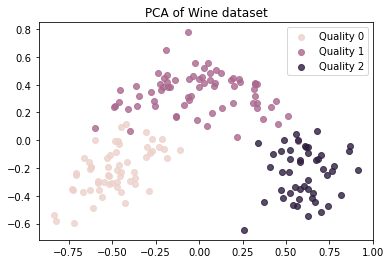

In [21]:
# Importam la llibreria de PCA de sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separam el dataset en les característiques i el target
x = wine_data.loc[:,'alcohol':'proline']
y = wine_data['wine_class']
target_names = ['Quality 0', 'Quality 1', 'Quality 2']

# Normalitzam les dades a treballar
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(x))
pca = PCA(n_components=2)
pca.fit(df)
x_r = pca.transform(df)
plt.figure()

for color, i, target_name in zip(pal, [0, 1, 2], target_names):
    plt.scatter(x_r[y == i, 0], x_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Repetiu la reducció de dimensionalitat, però en aquest cas utilitzant TSNE. Podeu trobar més informació sobre aquest algorisme al link:
    
[https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/)

Igual que abans, genereu un gràfic en 2D amb el resultat del TSNE utilitzant colors diferents per a cada classe de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.

<hr>
Suggeriment: No és necessari que programeu l'algorisme, podeu usar l'implementació disponible en la llibreria "scikit-learn".

Suggeriment: A part d'especificar el nombre de components, proveu d'utilitzar el paràmetre "perplexity".
</div>

<AxesSubplot:>

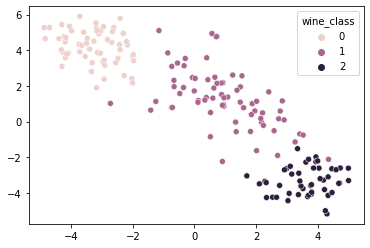

In [22]:
# Construim el model TSNE i el representam

tsne_model = TSNE(n_components=2, perplexity=60)  
x_tsne = tsne_model.fit_transform(df)  

sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=y, legend='full')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Observant els dos gràfics, creus que ha funcionat bé la reducció de dimensionalitat? Ha aconseguit separar les classes correctament? Quin dels dos mètodes ha funcionat millor?
    
Per què obtenim resultats tant diferents?
</div>

En tots dos casos ha funcionat bé la reducció de dimensionalitat, ja que ambdós mètodes han aconseguit separar en tres grups diferents segons la qualitat dels vins. Sembla que el mètode que ho fa amb un nivell més precís és el t-sne. El resultat és diferent perquè la metodologia de cada algorisme és diferent. 

El t-sne ajuda a fer que el clúster sigui més precís perque converteix les dades en un espai 2D on els punts estan en forma circular. Per altra banda és un mètode que no es troba afectat pels outliers, a més de que inclou altres paràmetres com la perplexity. Finalment, el PCA treballa rotant els vectors per preservar la variancia mentre que el t-sne tracta de reduir aquesta distància.

# 4. Entrenament i test (3 punts)

En aquest últim exercici es tracta d'aplicar un mètode d'aprenentatge supervisat, concretament el classificador Decision Tree (un arbre de decisió), per a predir la classe a la que pertany cada vi i evaluar la precisió obtinguda amb el model. Per això utilitzarem:

    - El conjunt de dades original amb tots els atributs
    - El conjunt de dades reduït a només 2 atributs amb el mètode PCA
    - El conjunt de dades reduït a només 2 atributs amb el mètode TSNE

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Utilitzant el conjunt de dades original:
    
 - Dividiu el dataset en train i test.
 - Definiu un model Decision Tree (fixant max_depth = 5 per mantenir el model simple).
 - Apliqueu validació creuada amb el model definit i el dataset de train (amb cv=5 ja és suficient).
 - Calculeu la mitjana i la desviació standard de la validació creuada.
    
<hr>
Suggeriment: Per separar entre train i test podeu utilitzar train_test_split de sklearn.

Suggeriment: Per entrenar un model random forest podeu utilitzar 'DecisionTreeClassifier' de sklearn.

Suggeriment: Per aplicar validació creuada podeu utilitzar 'cross_val_score' de sklearn.
</div>

In [23]:
# importam els mòduls necessaris

from sklearn.model_selection import train_test_split

# Separam les dades normalitzades i printejam el volum
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(119, 13) (119,)
(59, 13) (59,)


In [24]:
# importam els mòduls necessaris
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

# Cronstruim l'arbre de decisió
tree = DecisionTreeClassifier(max_depth=5)
tree = tree.fit(x_train, y_train)

# Calculam la precisió mitjançant la validació creuada
accuracy = cross_val_score(tree, x_train, y_train, cv=5)
print('Cross Validation mean is',accuracy.mean())
print('Cross Validation Standard Deviation is', accuracy.std())

Cross Validation mean is 0.9242753623188407
Cross Validation Standard Deviation is 0.048736934709447274


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Feu el fit amb tot el conjunt de train, i genereu l'arbre de decisió corresponent.
    
<hr>
Suggeriment: Per dibuixar arbres de decisió, veure aquest link:

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

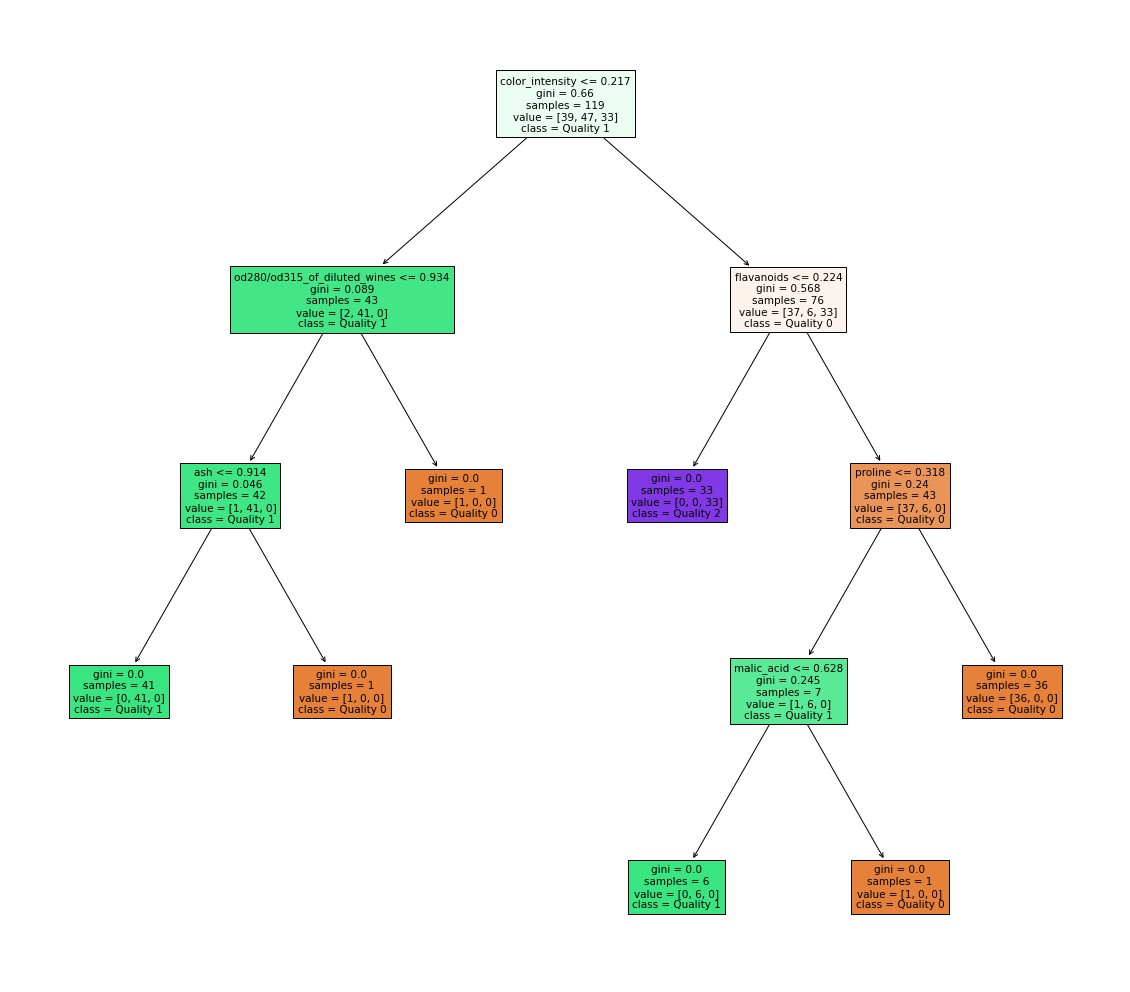

In [25]:
from sklearn.tree import plot_tree

# Representam l'arbre
fig = plt.figure(figsize=(20,18))
plot_tree(tree, feature_names = x.columns, class_names = target_names, filled = True)
plt.show

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Repetiu el mateix procediment que l'exercici anterior amb el dataset reduit a 2 dimensions amb PCA.
</div>

In [26]:
# Separam les dades resultants del pca calculat anteriorment.
x_train, x_test, y_train, y_test = train_test_split(x_r, y, test_size=0.33, random_state=42)


# Cronstruim l'arbre de decisió amb les dades del pca
tree = DecisionTreeClassifier(max_depth=5)
tree_pca = tree.fit(x_train, y_train)

# Calculam la precisió mitjançant la validació creuada
accuracy = cross_val_score(tree_pca, x_train, y_train, cv=5)
print('Cross Validation mean is',accuracy.mean())
print('Cross Validation Standard Deviation is', accuracy.std())

Cross Validation mean is 0.9579710144927537
Cross Validation Standard Deviation is 0.02636227501968298


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Repetiu el mateix procediment que l'exercici anterior amb el dataset reduit a 2 dimensions amb TSNE.
</div>

In [27]:
# Separam les dades resultants del t-sne calculat anteriorment.
x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.33, random_state=42)

# Cronstruim l'arbre de decisió amb les dades del t-sne
tree = DecisionTreeClassifier(max_depth=5)
tree_tsne = tree.fit(x_train, y_train)

# Calculam la precisió mitjançant la validació creuada
accuracy = cross_val_score(tree_tsne, x_train, y_train, cv=5)
print('Cross Validation mean is',accuracy.mean())
print('Cross Validation Standard Deviation is', accuracy.std())

Cross Validation mean is 0.9242753623188407
Cross Validation Standard Deviation is 0.031407004250390363


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Amb quines dades d'entrenament ha funcionat millor? Té sentit? Quadra amb els resultats que hem vist a l'exercici 3?
</div>

Es pot comprovar que el resultat més precís és l'arbre de decisió que treballa sobre els dos components prinicpals del PCA, ja que la mitjana de la validació creuada és la més elevada, de la mateixa manera que la desviació també és inferior. Té sentit perquè a l'exercici 3 el PCA representava els valors correctament, tot i que a primerva vista semblava que el t-sne donaria millors resultats. Una de les coses que pot haver ocasionat que la precisó del t-sne sigui inferior a la del pca pot ser que el valor de la perplexity no estigui ajustat correctament, ja que aquest valor fa canviar considerablement el gràfic. Tot i així, s'ha de dir que les diferències entre l'arbre de decisió amb pca i t-sne no són gaire rellevants i ambdós compten amb una bona precisió.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Amb el millor model que hagueu obtingut:
    
 - Genereu prediccions sobre el dataset de test.
 - Calculeu la precisió de les prediccions obtingudes i la matriu de confusió associada.
 
<hr>
Suggeriment: Per calcular la precisió i matriu de confusió podeu utilitzar les funcions dins del mòdul 'metrics' de sklearn.
</div>

In [28]:
# Calculam la precisió de l'arbre de decisió amb les dades del pca
x_train, x_test, y_train, y_test = train_test_split(x_r, y, test_size=0.33, random_state=42)
score = tree_pca.score(x_test, y_test)
print(score)

0.9661016949152542


In [29]:
# Mostram la matriu de confusió
y_pred = tree_pca.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[19,  1,  0],
       [ 0, 23,  1],
       [ 0,  0, 15]])

Per concloure, es pot dir que aquest model ha realitzat una predicció bona de 96,6% de la qual només ha fallat en 2 observacions de 59.